In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import missingno as msno
# импорт необходимых библиотек

In [411]:
df = pd.read_csv('help.csv')  #загрузка датасета

In [412]:
df.head(10) # проверяем загрузился ли датасет и знакомимся с ним

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,ID 13196900,homeowner,https://balashikha.cian.ru/sale/flat/307612084/,Балашиха,sale,flat,7,15,1,23.0,...,-1,-1,-1,-1,79623671587,NaN,Реутовская,14,Реутов,Измайловский лес
1,На Петровке,real_estate_agent,https://balashikha.cian.ru/sale/flat/306908232/,Балашиха,sale,flat,12,16,1,24.0,...,-1,-1,15 м²,4 м²,79623644015,NaN,Яганова,5,Щёлковская,Пехра
2,ОГРК,real_estate_agent,https://balashikha.cian.ru/sale/flat/294341061/,Балашиха,sale,flat,13,18,1,23.7,...,-1,-1,14 м²,4 м²,79672089940,NaN,Яганова,12,Щёлковская,Пехра
3,ИНКОМ-Недвижимость,real_estate_agent,https://balashikha.cian.ru/sale/flat/308998076/,Балашиха,sale,flat,11,18,1,37.5,...,-1,-1,"17,1 м²","11,2 м²",79671668161,NaN,Зеленая,33,Никольское,Жемчужина Балашихи
4,Пилигрим,real_estate_agent,https://balashikha.cian.ru/sale/flat/308475077/,Балашиха,sale,flat,12,21,1,41.0,...,-1,-1,20 м²,9 м²,79183721059,NaN,Граничная,38,Ольгино,NaN
5,NaN,NaN,https://balashikha.cian.ru/sale/flat/308562516/,Балашиха,sale,flat,14,17,1,31.9,...,-1,Чистовая,-1,-1,78005116552,NaN,Безымянная,16,Железнодорожная,Столичный
6,Елизавета Кондрашова,realtor,https://balashikha.cian.ru/sale/flat/303304062/,Балашиха,sale,flat,9,19,1,37.5,...,-1,-1,19 м²,8 м²,79057199105,NaN,Речная,6,Кучино,Южное Кучино 2
7,i-deal,real_estate_agent,https://balashikha.cian.ru/sale/flat/308426529/,Балашиха,sale,flat,20,22,1,29.8,...,-1,-1,14 м²,7 м²,79660624101,NaN,Бояринова,15,Ольгино,Новоград Павлино
8,NaN,NaN,https://balashikha.cian.ru/sale/flat/308701782/,Балашиха,sale,flat,13,17,1,30.4,...,-1,Чистовая,-1,-1,78005116552,NaN,Проектная,9Ас1,Щёлковская,Идеал
9,Максим Мячин,realtor,https://balashikha.cian.ru/sale/flat/307097710/,Балашиха,sale,flat,6,22,1,32.6,...,-1,-1,"12,5 м²",11 м²,79651080337,NaN,проспект Героев,16,Железнодорожная,NaN


In [413]:
df.columns # смотрим колонки

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'house_material_type', 'heating_type', 'finish_type', 'living_meters',
       'kitchen_meters', 'phone', 'district', 'street', 'house_number',
       'underground', 'residential_complex'],
      dtype='object')

In [414]:
df.info() # количество данных и их типы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                8505 non-null   object 
 1   author_type           8512 non-null   object 
 2   url                   8790 non-null   object 
 3   location              8790 non-null   object 
 4   deal_type             8790 non-null   object 
 5   accommodation_type    8790 non-null   object 
 6   floor                 8790 non-null   int64  
 7   floors_count          8790 non-null   int64  
 8   rooms_count           8790 non-null   int64  
 9   total_meters          8790 non-null   float64
 10  price                 8745 non-null   float64
 11  year_of_construction  8790 non-null   object 
 12  object_type           8790 non-null   int64  
 13  house_material_type   8790 non-null   object 
 14  heating_type          8790 non-null   int64  
 15  finish_type          

In [415]:
df.describe() # можем заметить некорректные значения

,floor,floors_count,rooms_count,total_meters,price,object_type,heating_type
count,8790.000000,8790.000000,8790.000000,8790.000000,8.745000e+03,8790.0,8790.0
mean,8.077247,15.163709,2.170535,69.417416,3.674050e+07,-1.0,-1.0
std,7.852814,10.909444,1.150293,52.499836,1.005517e+08,0.0,0.0
min,1.000000,1.000000,-1.000000,11.000000,6.500000e+05,-1.0,-1.0
25%,3.000000,8.000000,1.000000,40.000000,6.300000e+06,-1.0,-1.0
50%,5.000000,14.000000,2.000000,53.900000,9.200000e+06,-1.0,-1.0
75%,11.000000,20.000000,3.000000,75.000000,1.850000e+07,-1.0,-1.0
max,82.000000,95.000000,5.000000,663.000000,2.418390e+09,-1.0,-1.0


In [416]:
df.replace([-1, -1.0, '-1', '-1.0'], np.nan, inplace=True) #заменяю пустые значения

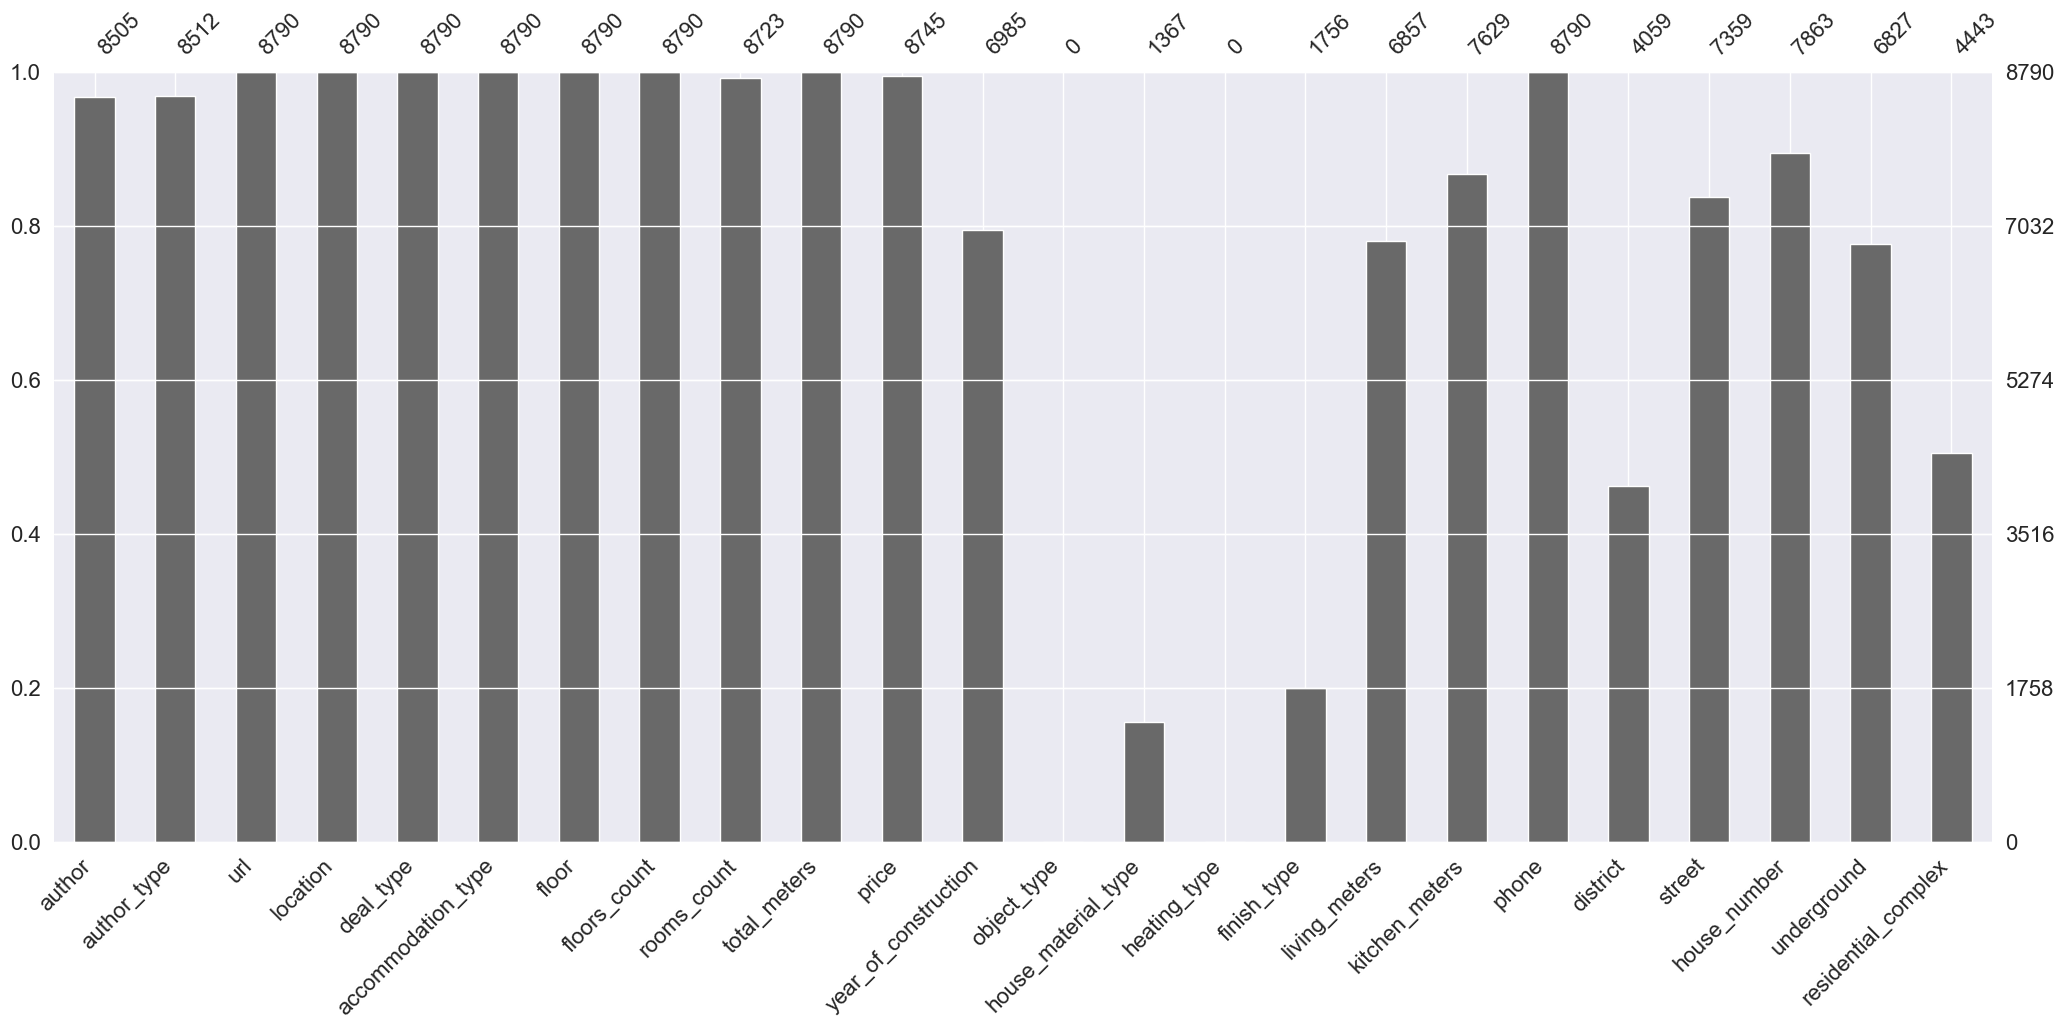

In [417]:
msno.bar(df) # смотрим количество незаполненных данных
sns.set()

In [418]:
df.isnull().sum() # количество пропущенных значений

author                   285
author_type              278
url                        0
location                   0
deal_type                  0
accommodation_type         0
floor                      0
floors_count               0
rooms_count               67
total_meters               0
price                     45
year_of_construction    1805
object_type             8790
house_material_type     7423
heating_type            8790
finish_type             7034
living_meters           1933
kitchen_meters          1161
phone                      0
district                4731
street                  1431
house_number             927
underground             1963
residential_complex     4347
dtype: int64

In [419]:
# кодируем данные
def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column]) 
    return result, encoders

encoded_data, encoders = number_encode_features(df) 
encoded_data.head() # проверяем

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,511,1,516,1,0,0,7,15,1.0,23.0,...,NaN,24,804,367,1748,195,365,166,214,339
1,2135,3,438,1,0,0,12,16,1.0,24.0,...,NaN,24,141,289,1723,195,465,730,300,573
2,2223,3,47,1,0,0,13,18,1.0,23.7,...,NaN,24,123,289,3370,195,465,100,300,573
3,1831,3,909,1,0,0,11,18,1.0,37.5,...,NaN,24,156,14,3356,195,678,538,154,322
4,2307,3,636,1,0,0,12,21,1.0,41.0,...,NaN,24,223,366,1601,195,132,592,172,781


array([[<Axes: title={'center': 'author'}>,
        <Axes: title={'center': 'author_type'}>,
        <Axes: title={'center': 'url'}>,
        <Axes: title={'center': 'location'}>,
        <Axes: title={'center': 'deal_type'}>],
       [<Axes: title={'center': 'accommodation_type'}>,
        <Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'floors_count'}>,
        <Axes: title={'center': 'rooms_count'}>,
        <Axes: title={'center': 'total_meters'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year_of_construction'}>,
        <Axes: title={'center': 'object_type'}>,
        <Axes: title={'center': 'house_material_type'}>,
        <Axes: title={'center': 'heating_type'}>],
       [<Axes: title={'center': 'finish_type'}>,
        <Axes: title={'center': 'living_meters'}>,
        <Axes: title={'center': 'kitchen_meters'}>,
        <Axes: title={'center': 'phone'}>,
        <Axes: title={'center': 'district'}>],
       [<Axes: title={'

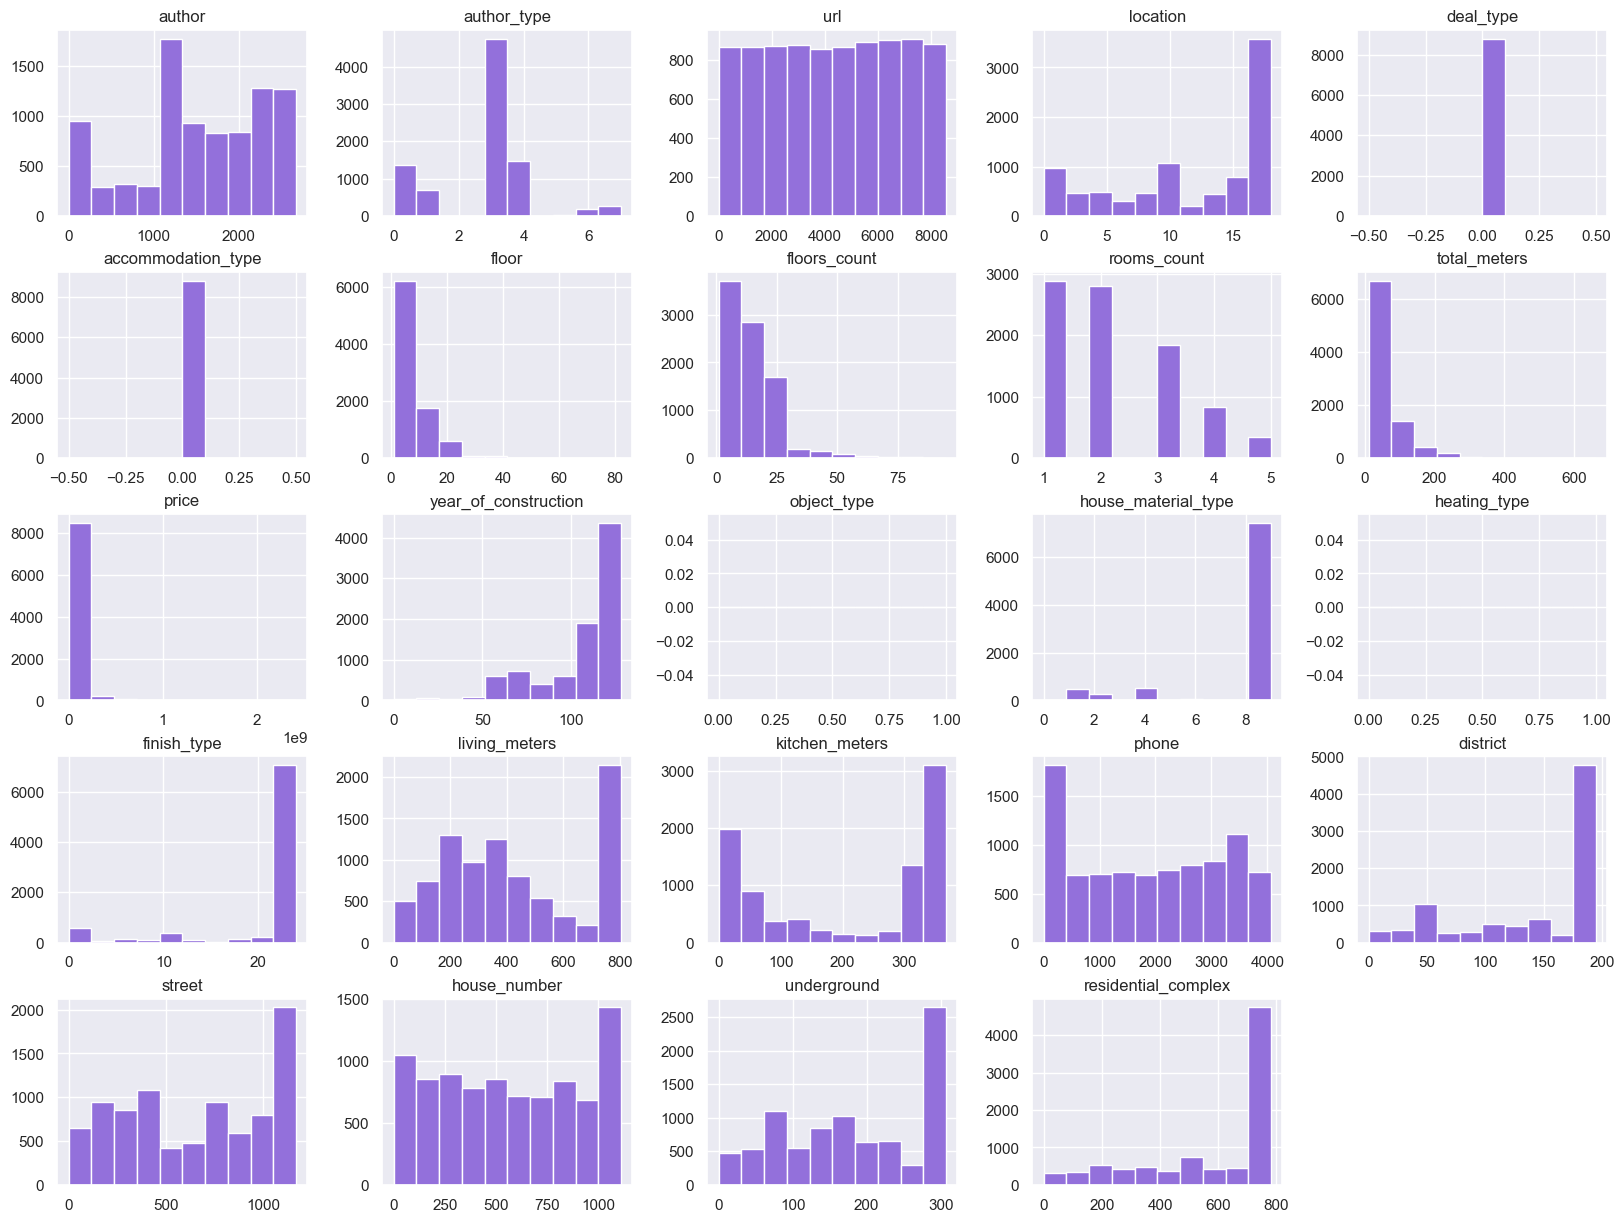

In [420]:
encoded_data.hist(figsize = (20,15), color = 'mediumpurple')

<Axes: >

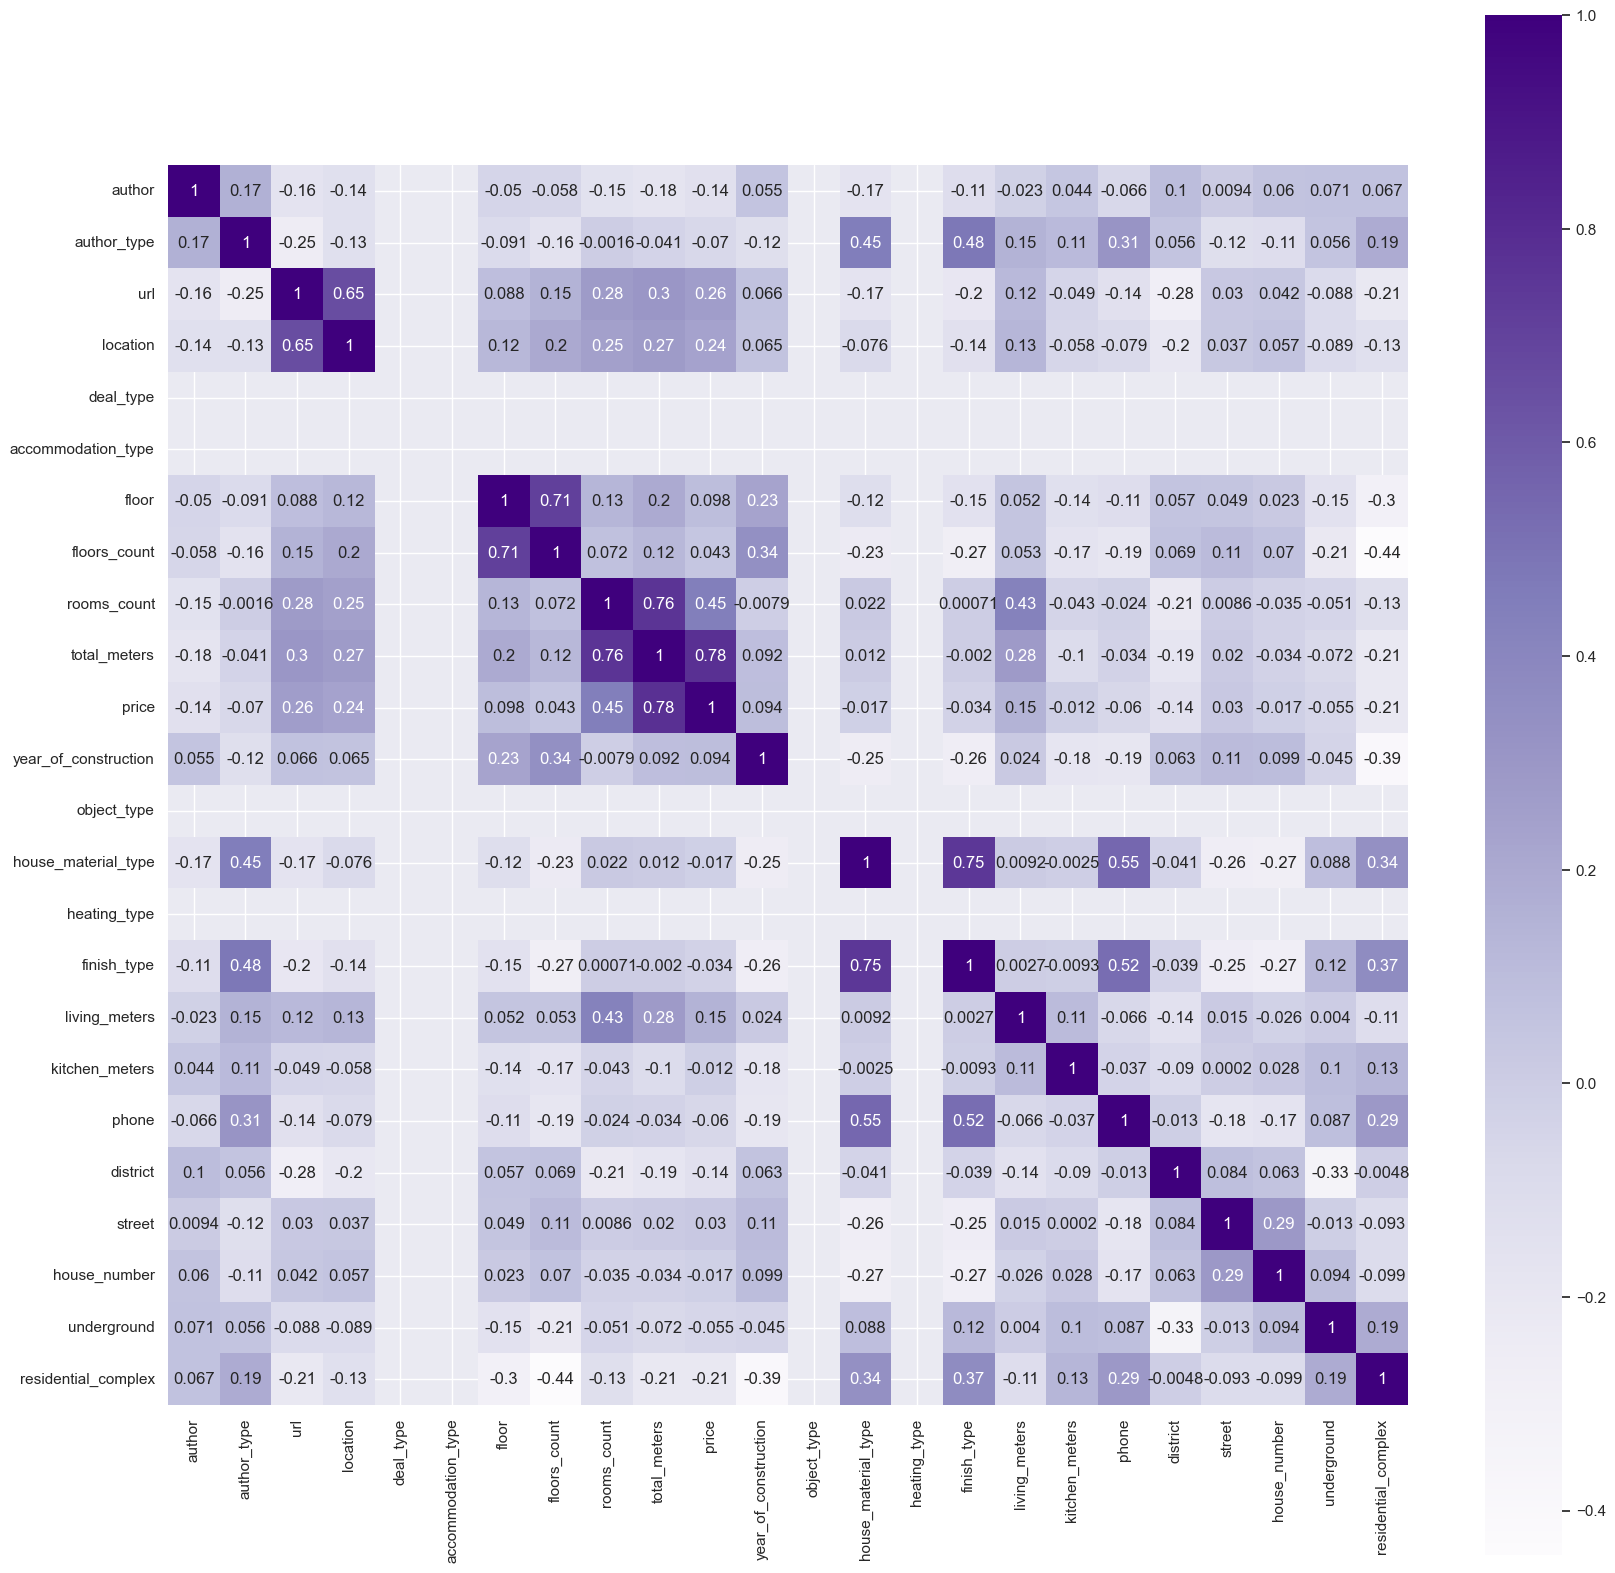

In [421]:
# смотрим корреляцию
plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='Purples')

In [422]:
for col in df.columns:                                      # данные о пропусках в процентах
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 3%
author_type - 3%
url - 0%
location - 0%
deal_type - 0%
accommodation_type - 0%
floor - 0%
floors_count - 0%
rooms_count - 1%
total_meters - 0%
price - 1%
year_of_construction - 21%
object_type - 100%
house_material_type - 84%
heating_type - 100%
finish_type - 80%
living_meters - 22%
kitchen_meters - 13%
phone - 0%
district - 54%
street - 16%
house_number - 11%
underground - 22%
residential_complex - 49%


In [423]:
df = df.drop(['deal_type', 'accommodation_type', 'object_type', 'heating_type'], axis = 1) # удаляем пустые колонки

<Axes: >

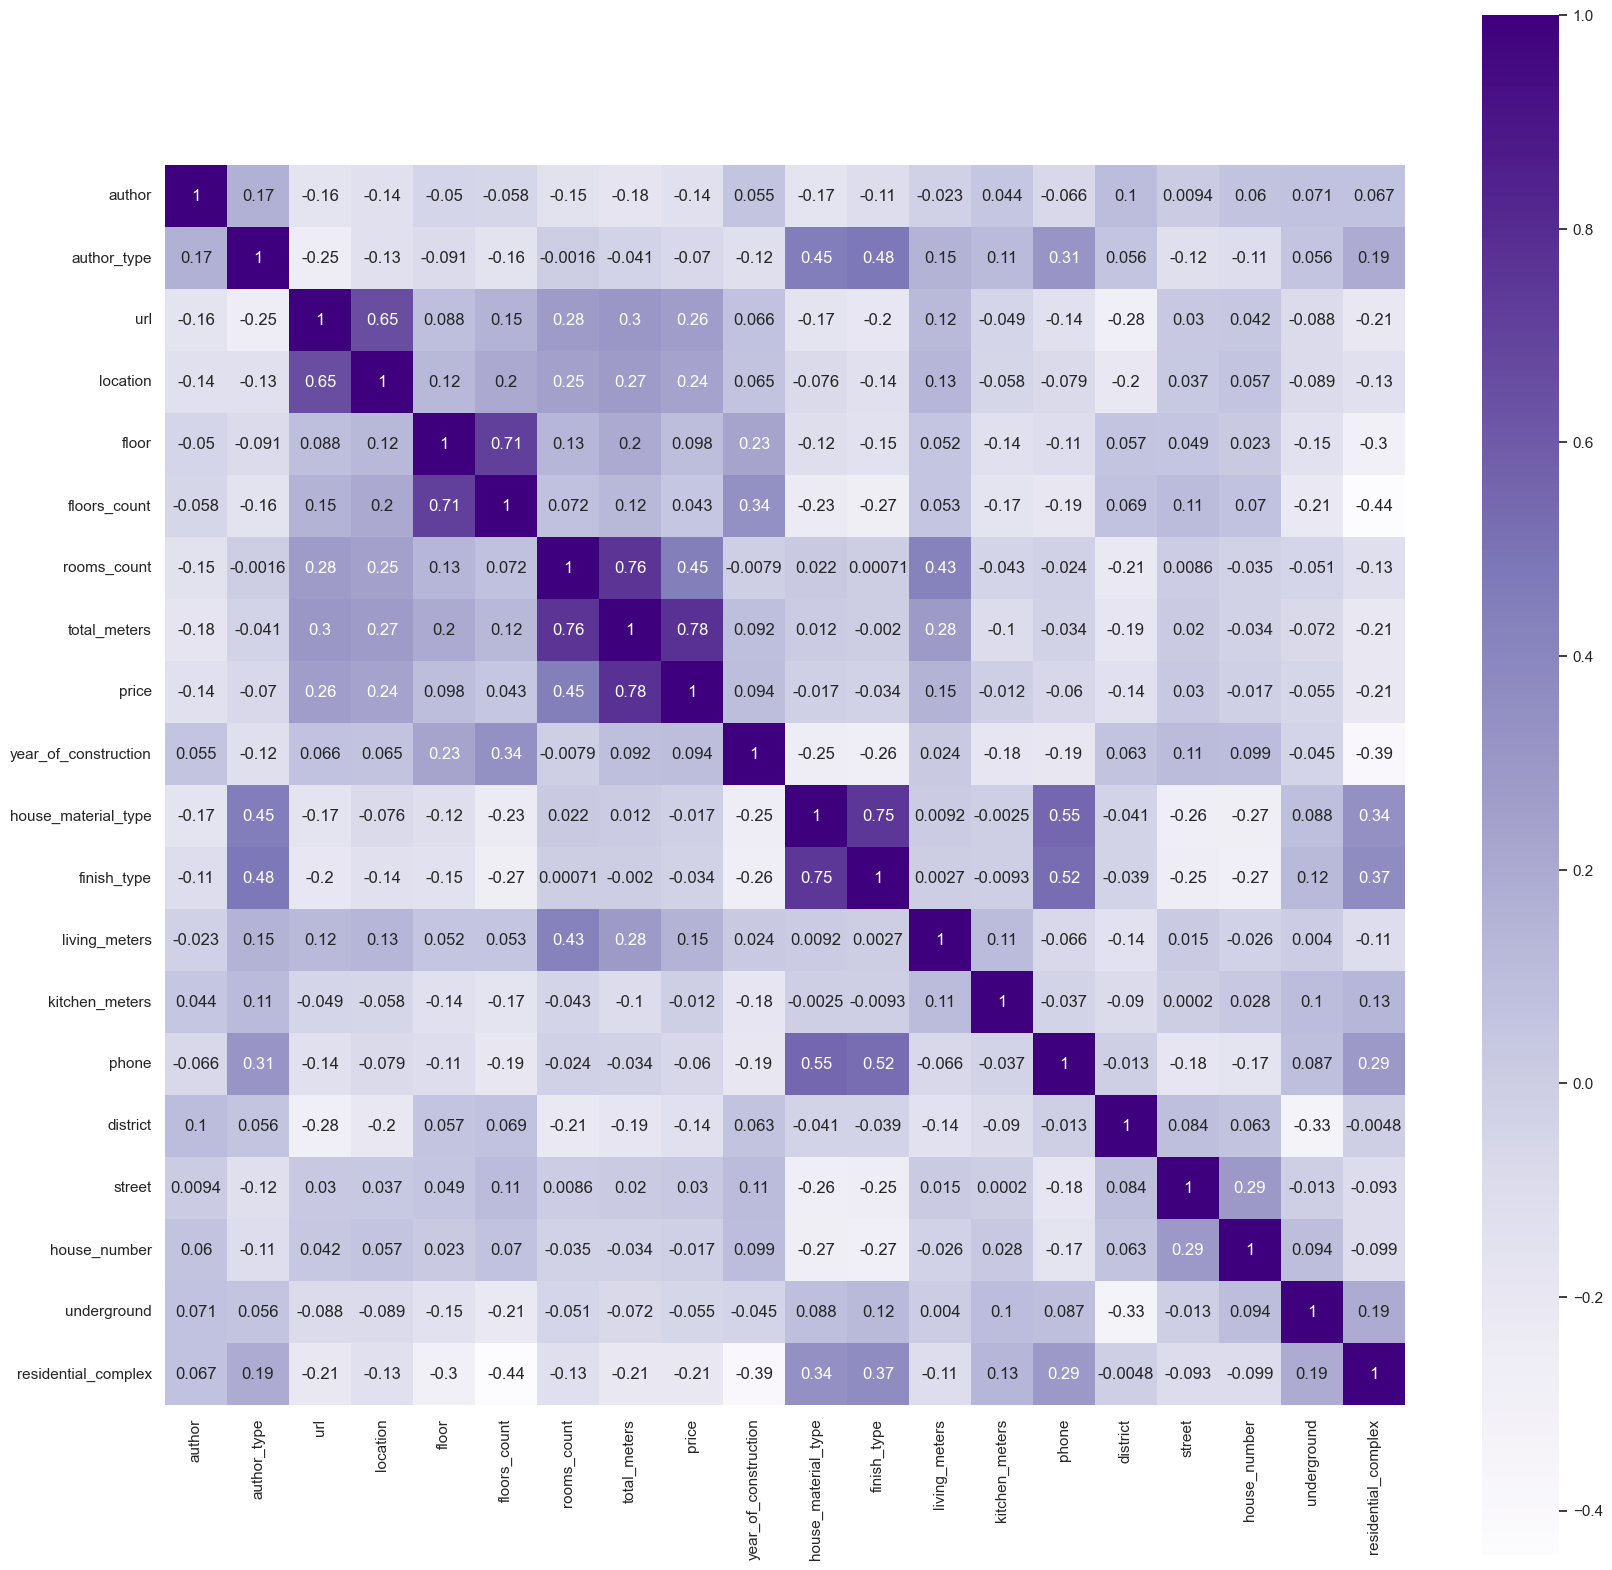

In [424]:
plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='Purples')

In [425]:
df = df.drop(['author', 'url', 'phone', 'house_number', 'residential_complex', 'district'], axis = 1)

<Axes: >

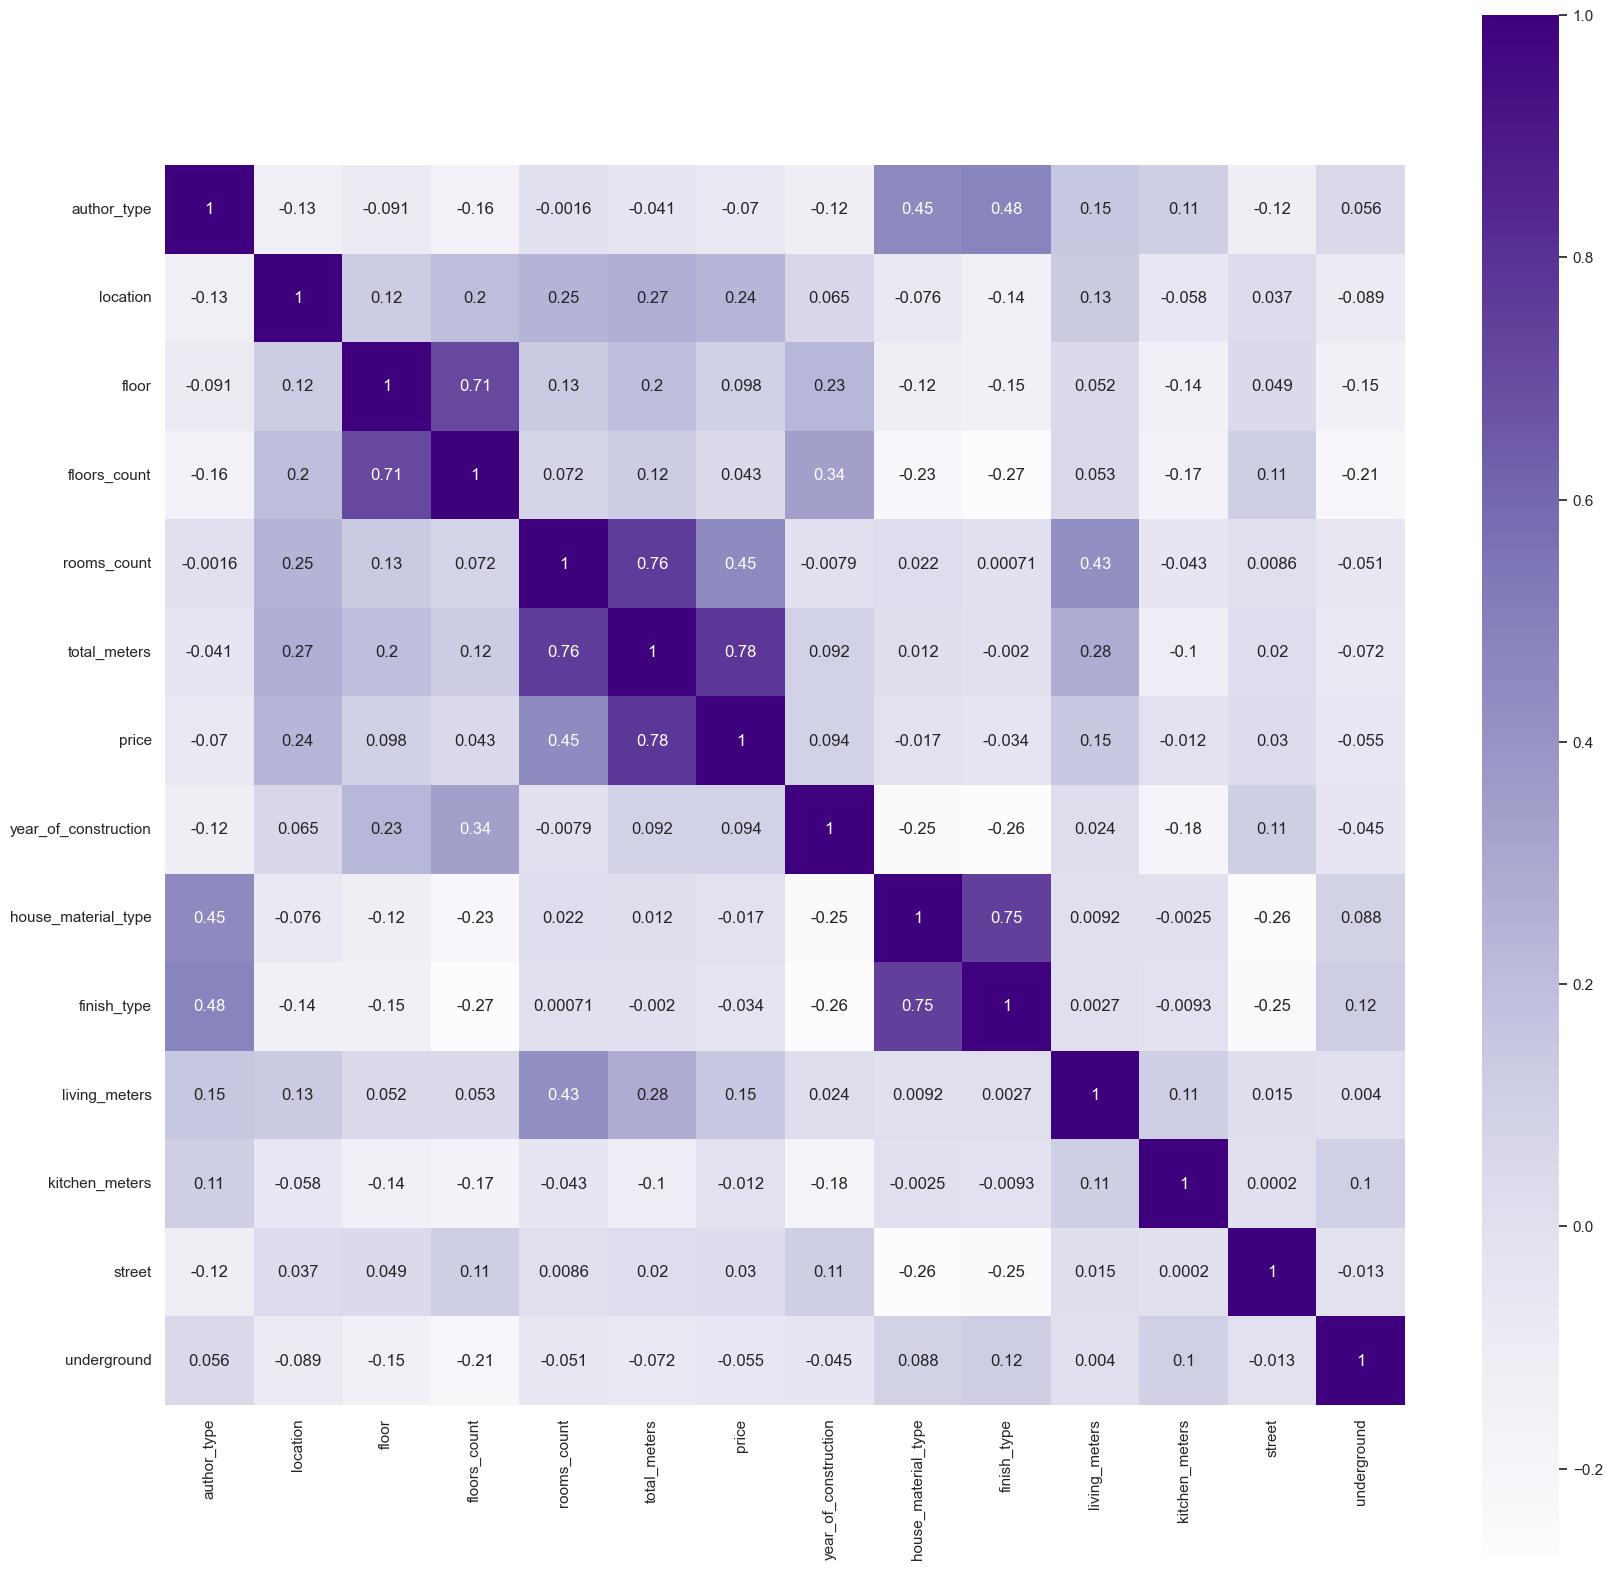

In [426]:
plt.subplots(figsize=(20,20))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='Purples')

In [427]:
df = df.drop(['house_material_type', 'finish_type'], axis = 1)

<Axes: >

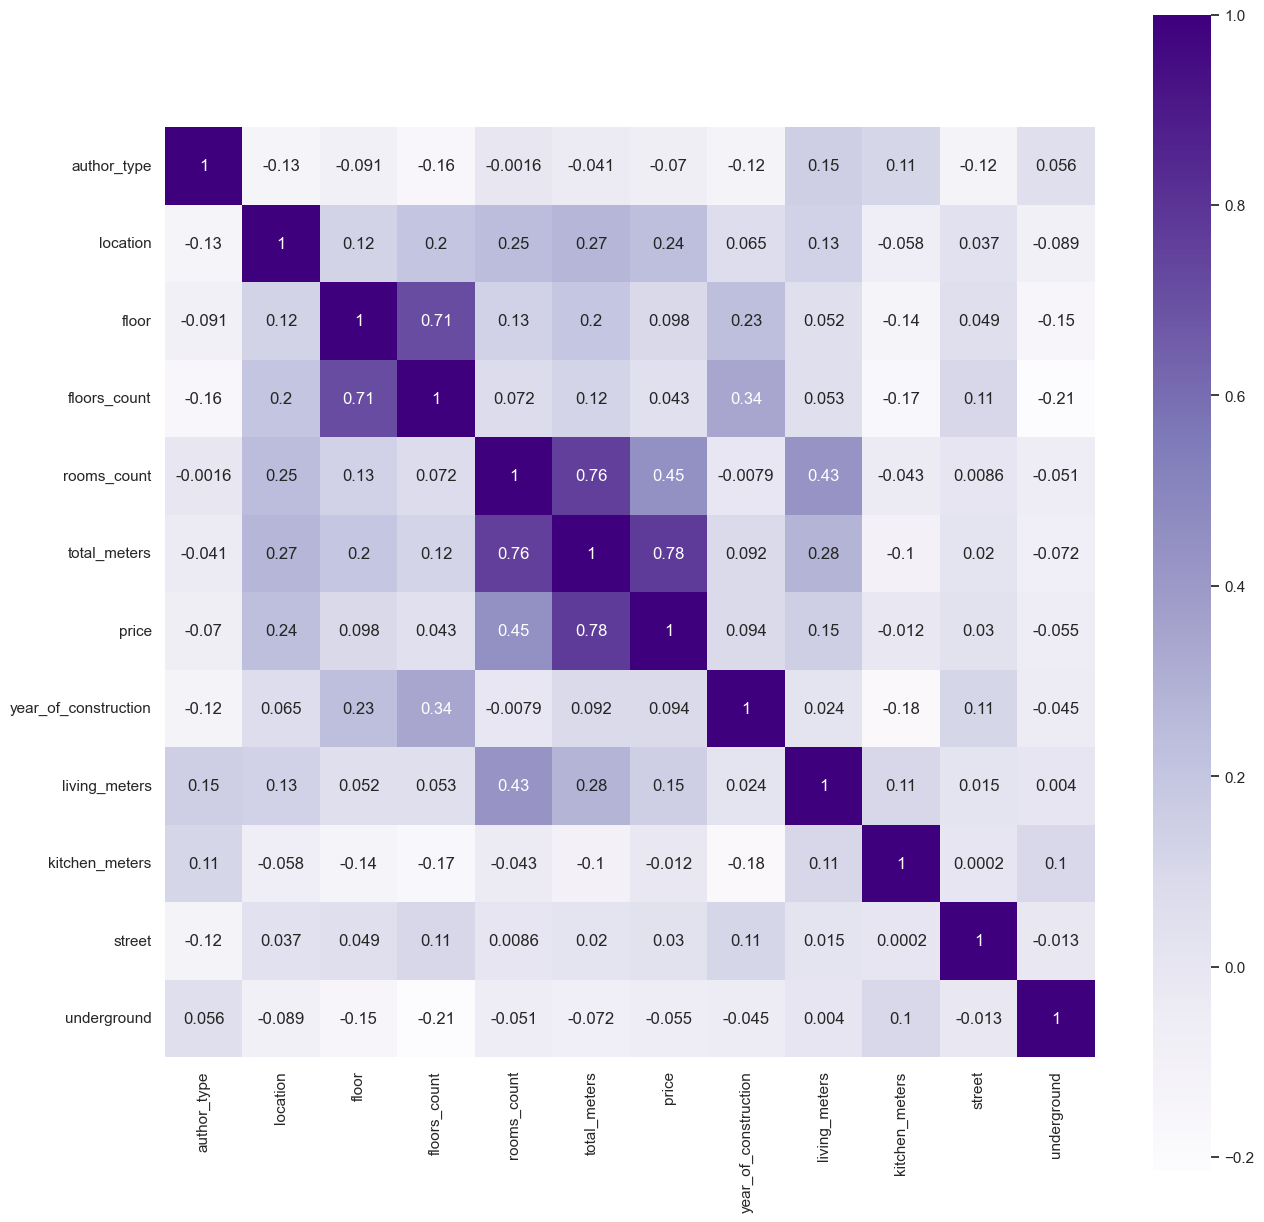

In [428]:
plt.subplots(figsize=(15,15))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True, annot=True, cmap='Purples')

<Axes: >

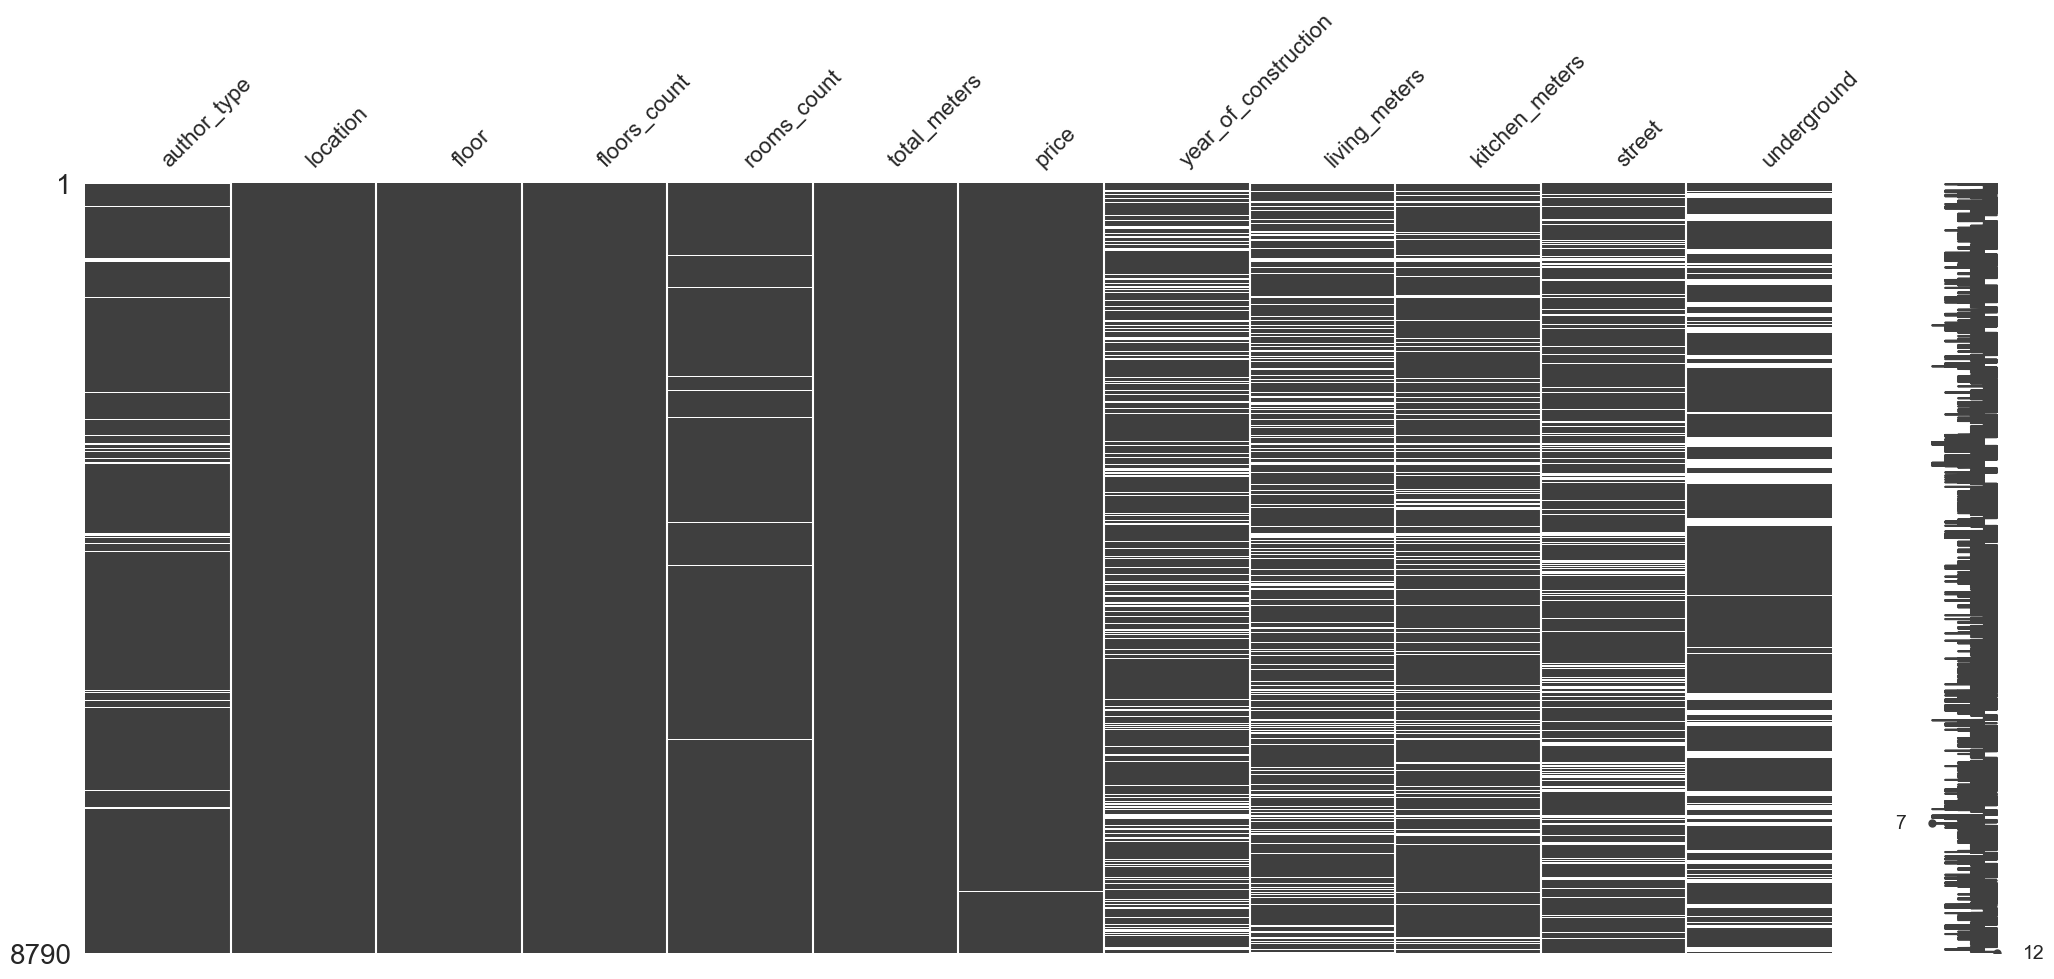

In [429]:
msno.matrix(df)

In [430]:
df[['living_meters']].describe()

,living_meters
count,6857
unique,804
top,18 м²
freq,296


In [431]:
value_counts = df['living_meters'].value_counts()
print(value_counts)

living_meters
18 м²       296
30 м²       253
20 м²       180
19 м²       150
17 м²       150
           ... 
83,8 м²       1
49,8 м²       1
128,2 м²      1
151,7 м²      1
78,8 м²       1
Name: count, Length: 804, dtype: int64


In [432]:
def process_column(column_name):
    df[column_name] = df[column_name].str[:-3]  # Убираем последние 3 символа
    df[column_name] = df[column_name].str.replace(',', '.', regex=False)  # Заменяем запятую на точку
    df[column_name] = df[column_name].astype(float)  # Преобразуем в float
    average = df[column_name].mean()  # Находим среднее
    df[column_name] = df[column_name].fillna(average)  # Заполняем пропуски средним значением

process_column('living_meters')
process_column('kitchen_meters')

print(df[['living_meters', 'kitchen_meters']].describe())

       living_meters  kitchen_meters
count    8790.000000     8790.000000
mean       36.350707       12.128759
std        25.630850        7.202732
min         1.000000        1.000000
25%        20.500000        8.000000
50%        35.000000       11.000000
75%        38.000000       13.000000
max       350.000000      103.900000


<Axes: >

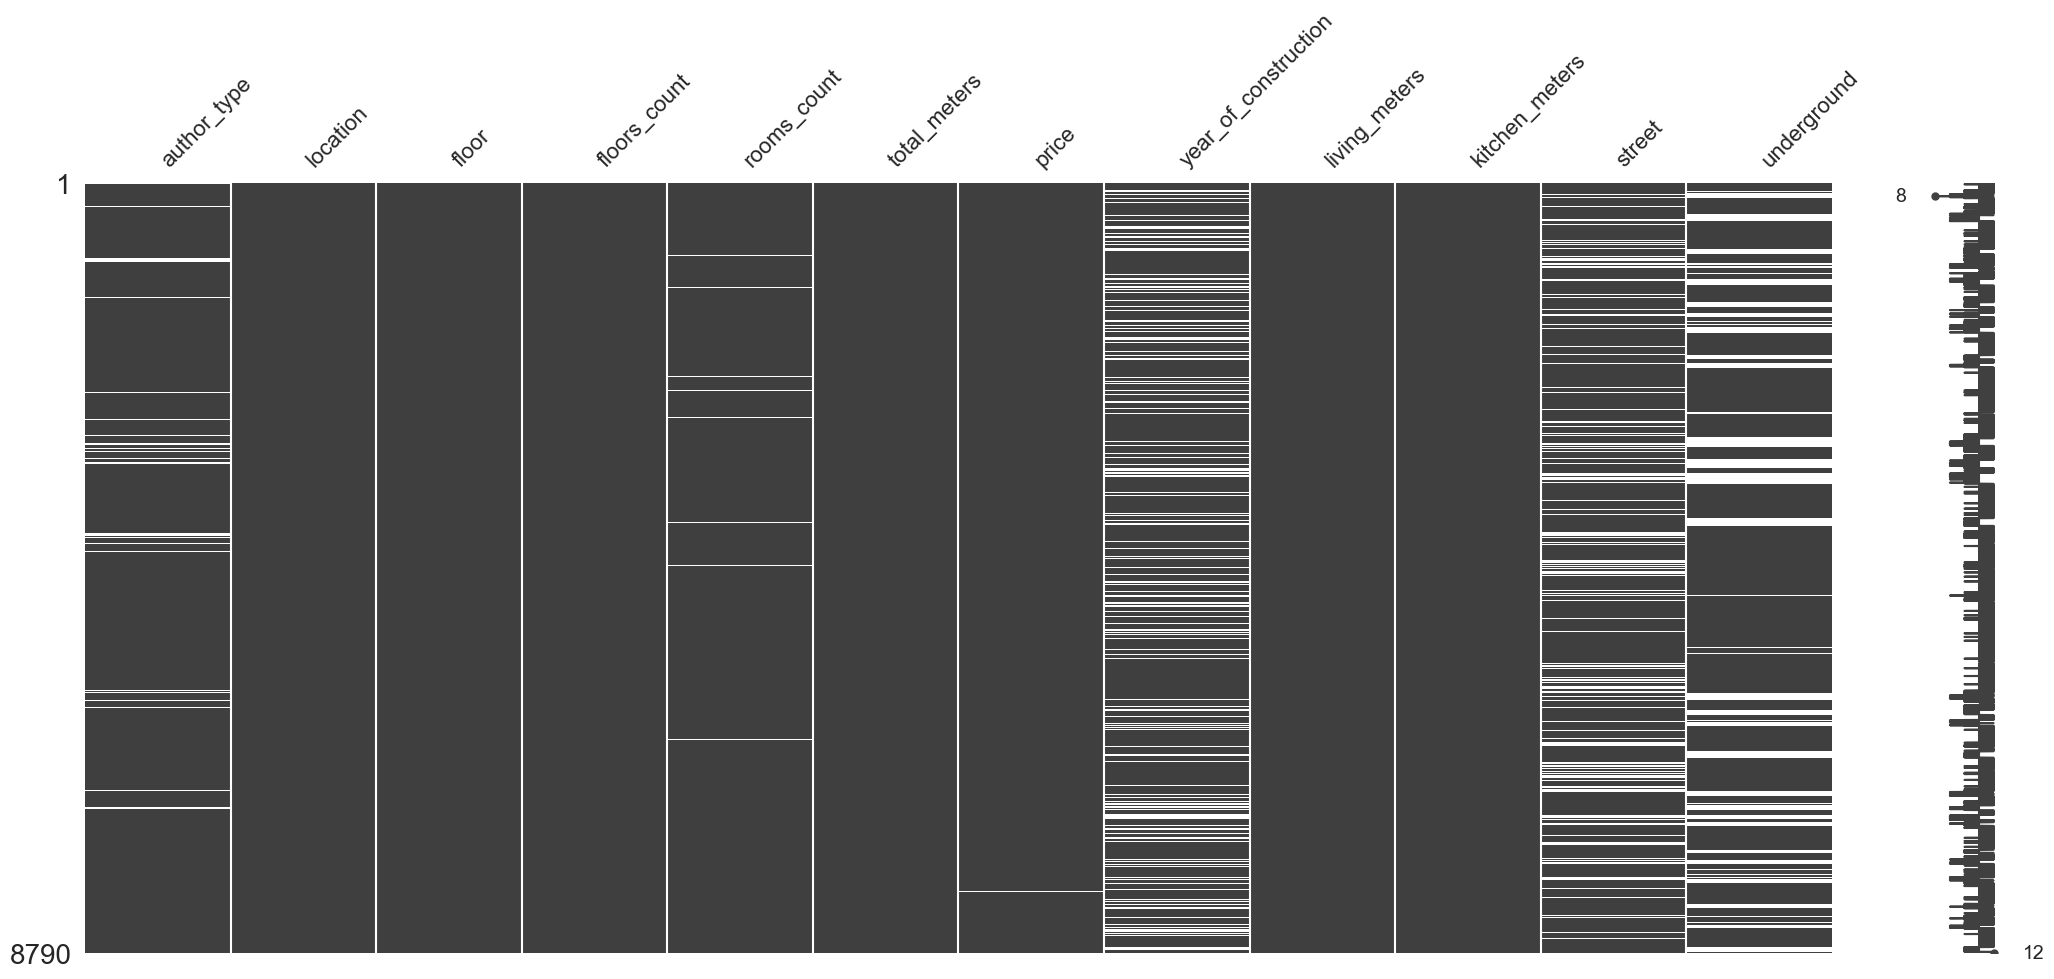

In [433]:
msno.matrix(df)

In [434]:
df = df.dropna(subset=['rooms_count', 'price', 'street']) # удаляем строки

<Axes: >

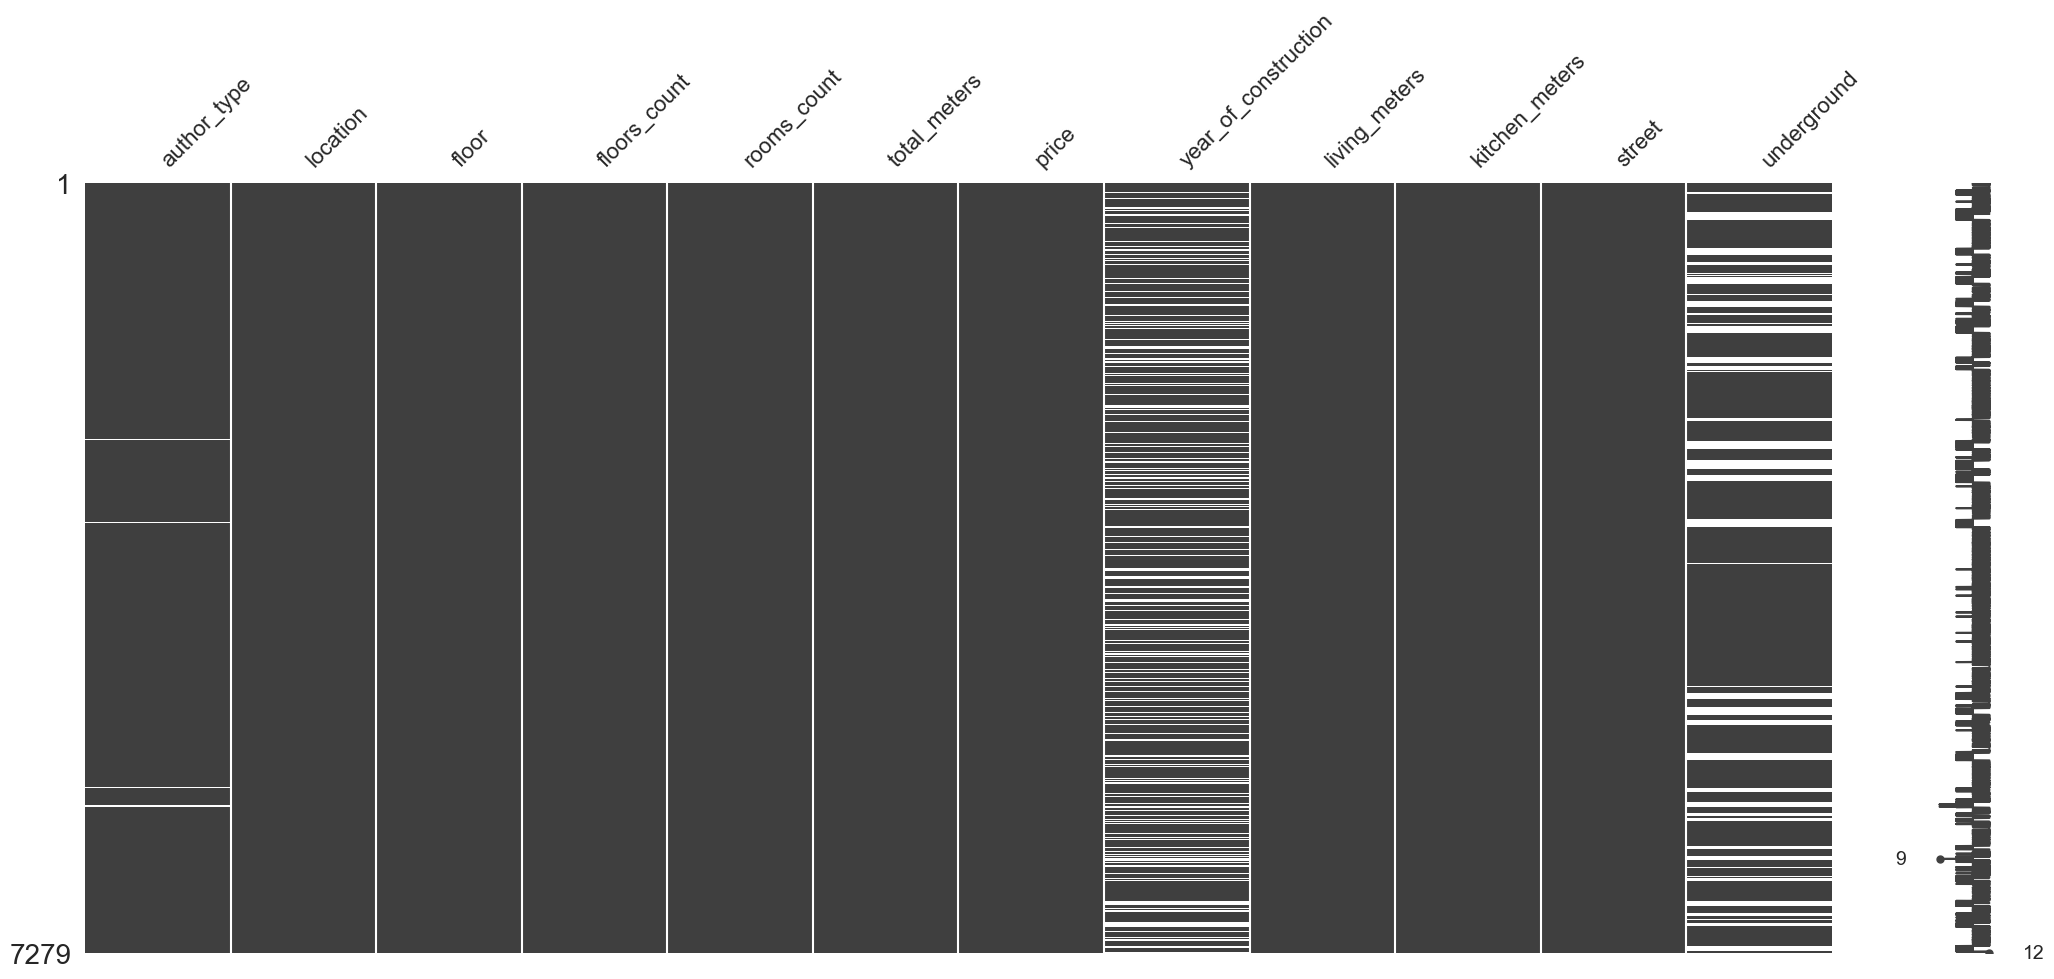

In [435]:
msno.matrix(df)

In [436]:
mode_value = df['author_type'].mode()[0] # заполняем модой
df['author_type'].fillna(mode_value, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20916\4273852936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['author_type'].fillna(mode_value, inplace=True)


<Axes: >

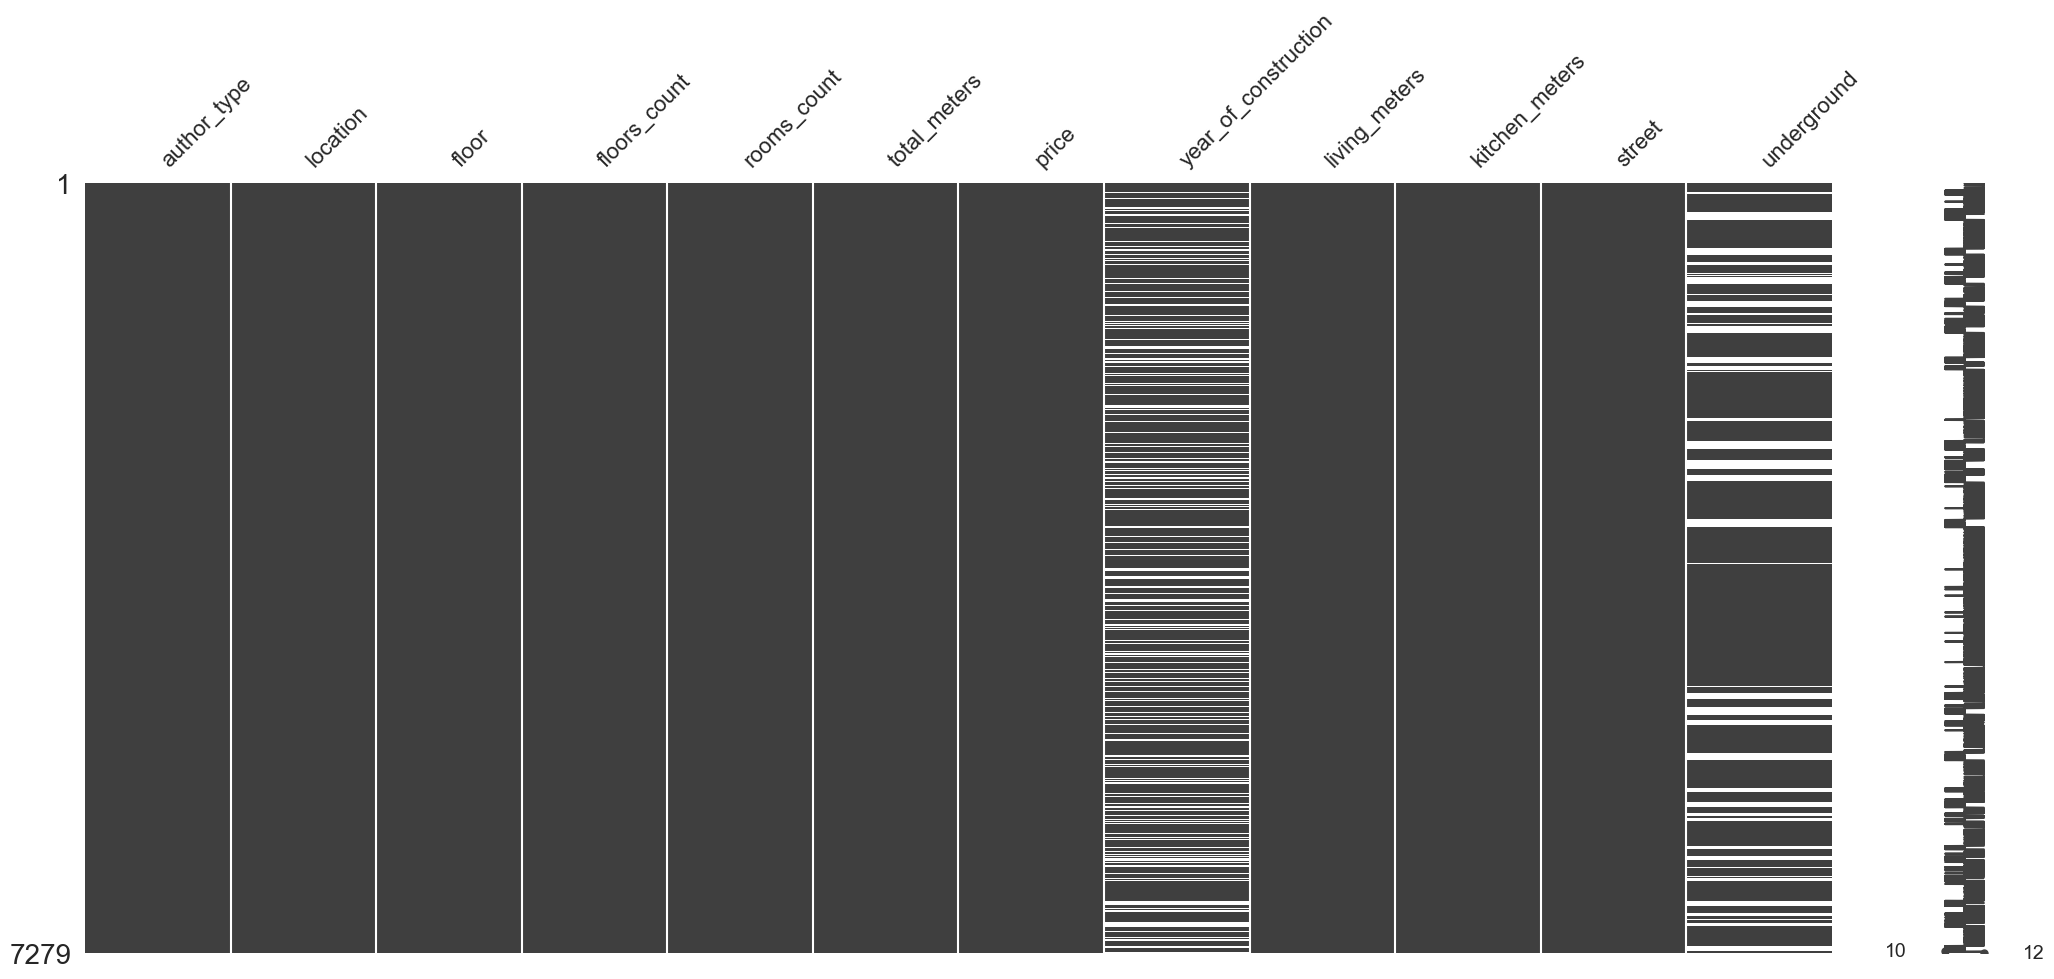

In [437]:
msno.matrix(df)

In [438]:
df['underground'] = df['underground'].fillna(df['location']) # заполняем городом

<Axes: >

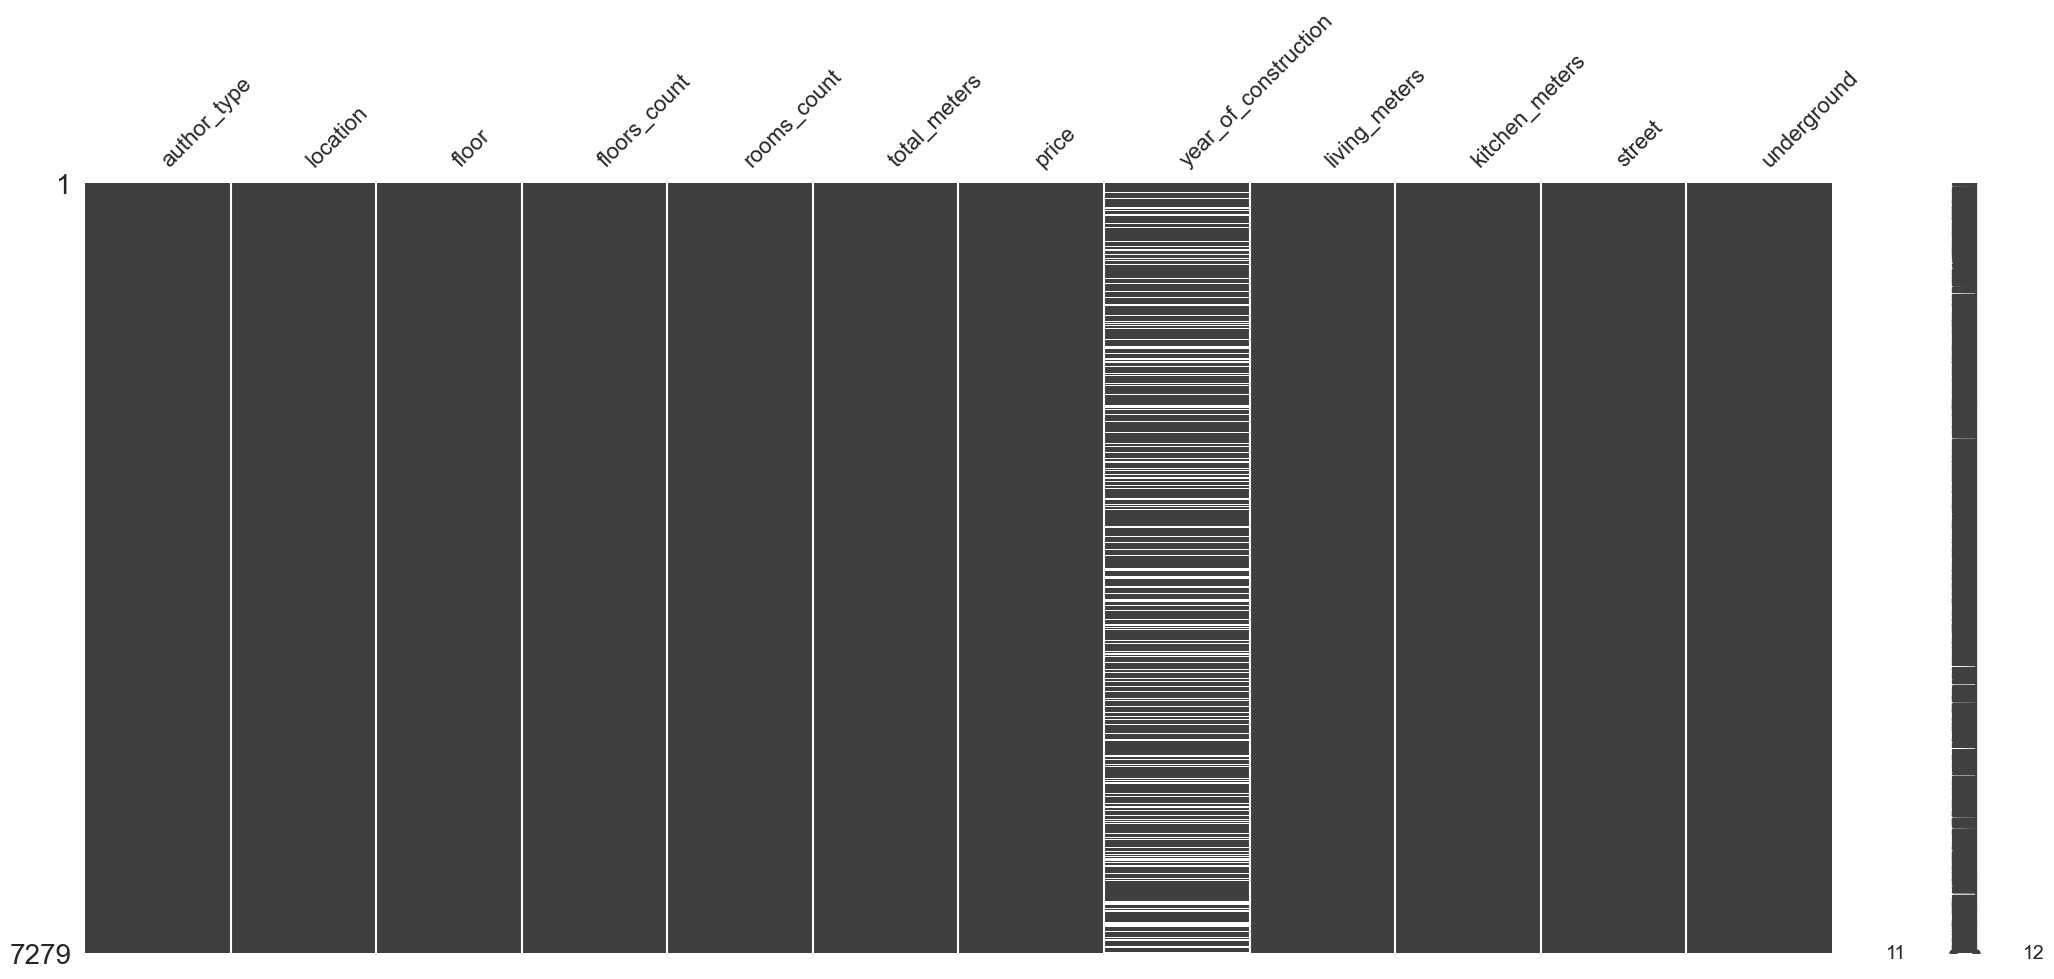

In [439]:
msno.matrix(df)